# Directing Customers to Subscription Through Financial App Behaviour Analysis
- ML project 

## Goal of Fin-Tech(Financial Technology) Company-
The main goal of the company is to sell the premium version app with low advertisement cost
they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

## Import Essential Libraries

In [1]:
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type

## Import dataset and explore


In [2]:
FineTech_appData = pd.read_csv('FineTech_appData.csv')

In [3]:
FineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
FineTech_appData.shape

(50000, 12)

In [5]:
FineTech_appData.tail(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49994,90813,2013-02-25 19:35:12.691,0,19:00:00,36,"idscreen,joinscreen,Cycle,product_review,produ...",25,0,0,1,2013-02-25 19:36:56.082,0
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [6]:
# The 6th number column’s (screen_list) full information not visible, so for that we used below python code snippet. We print only 5 rows from index 1 to 5 from the screen_list.
for i in range(1,6):
    print(FineTech_appData.loc[i,'screen_list'], '\n')

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



##  Know about dataset

As you can see in fineTech_appData DataFrame, there are 50,000 users data with 12 different features. Let’s know each and every feature in brief.

1. user: Unique ID for each user.

2. first_open: Date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) of login on app first time.

3. dayofweek: On which day user logon.

0: Sunday
1: Monday
2: Tuesday
3: Wednesday
4: Thursday
5: Friday
6: Saturday
4. Hour: Time of a day in 24-hour format customer logon. It is correlated with dayofweek column.

5. age: The age of the registered user.

6. screen_list: The name of multiple screens seen by customers, which are separated by a comma.

7. numscreens: The total number of screens seen by customers.

8. minigame: Tha app contains small games related to finance. If the customer played mini-game then 1 otherwise 0.

9. used_premium_feature: If the customer used the premium feature of the app then 1 otherwise 0.

10. enrolled: If the user bought a premium feature app then 1 otherwise 0.

11. enrolled_date: On the date (yy-mm-dd) and time (Hour:Minute:Seconds:Milliseconds) the user bought a premium features app.

12. liked: The each screen of the app has a like button if the customer likes it then 1 otherwise 0.



## Find the null value in DataFrame using DataFrame.isnull() method and take summation by sum() method.

In [7]:
FineTech_appData.isnull().sum() # take summation of null values

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

-All columns contain 0 null value except enrolled_date. The enrolled_date column has total 18926 null values.

In [8]:
FineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.8+ MB


We can see in the output provided by DataFrame.info() method, there are 50,000 entries (rows) from 0 to 49999 and a total of 12 columns.

All columns have 50,000 non-null values except enrolled_date. It has 31,074 non-null. There is a total of 8 columns that contain integer 64 bit (int64) values and the remaining 4 are object type.

The size of fineTech_appData DataFrame is 4.6 MB.

# To know how the numeric variable distributed, we used 
DataFrame.describe() method. It gives total number count, mean value, std (standard deviation), min and max value, and values are below 25%, 50%, 75% of each column.

In [9]:
FineTech_appData.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


From the output, we can know more about the dataset. The mean age of the customer is 31.72. Only 10.7% of customers played minigame and 17.2% customer used premium features of the app, likes 16.5 %. The 62.1% customer enrolled in the premium app.

If you observe the description of ‘dayofweek’ column then you can not get proper information. To solve this issue we print unique values of each column and its length.

In [10]:
# to check unique valye of each column and to get its length
features = FineTech_appData.columns
for i in features:
    print("""Unique value of {}\n{}\nlen is {} \n........................\n
          """.format(i, FineTech_appData[i].unique(), len(FineTech_appData[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
........................

          
Unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is 49747 
........................

          
Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
........................

          
Unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is 24 
........................

          
Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52 

In the above output, we got information about the ‘dayofweek’ and ‘hour’ columns. The customer registers the app each day of the week and 24 hours.

The ‘hour’ column contains object data type, so we converted into integer data type format.

In [11]:
#  hour data convert string to int
FineTech_appData['hour'] = FineTech_appData.hour.str.slice(1,3).astype(int) 
 
# get data type of each columns
FineTech_appData.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
FineTech_appData.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [13]:
# WE have 3 columns which are object type and for visualization we need to drop these columns

In [14]:
# drop object dtype columns
FineTech_appData2 = FineTech_appData.drop(['user', 'first_open', 'screen_list', 'enrolled_date'], axis = 1)

In [15]:
FineTech_appData2.head(6)

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1
5,2,9,20,14,0,0,1,0


# Data Visualization

Heatmap using the correlation matrix
Heatmap uses to find the correlation between each and every features using the correlation matrix.

Text(0.5, 1.0, 'Heatmap using correlation matrix of fineTech_appData2')

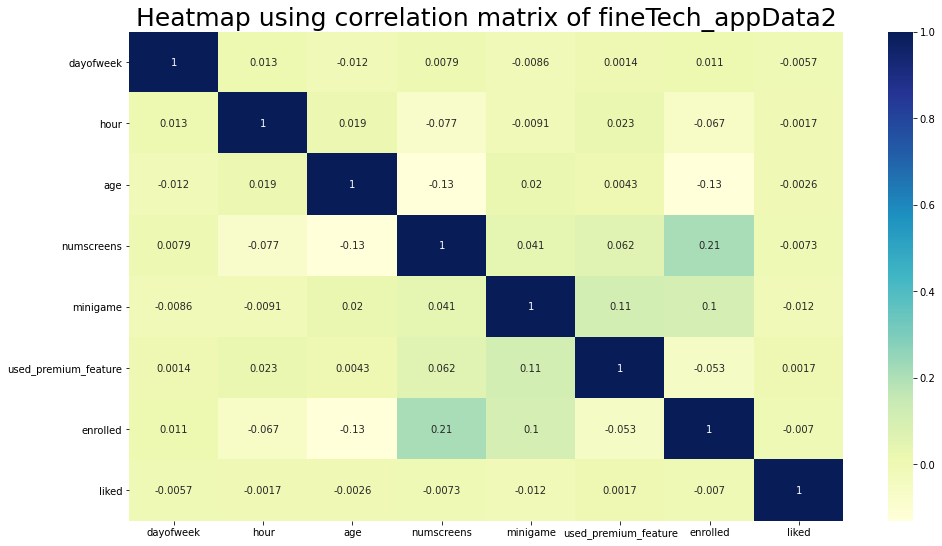

In [16]:
# Heatmap
plt.figure(figsize=(16,9))

sns.heatmap(FineTech_appData2.corr(), annot = True, cmap = 'YlGnBu', cbar = True)

plt.title("Heatmap using correlation matrix of fineTech_appData2", fontsize = 25)

In the fineTech_appData2 dataset, there is no strong correlation between any features. There is little correlation between ‘numscreens’ and ‘enrolled’. It means that those customers saw more screen they are taking premium app. There is a slight correlation between ‘minigame’ with ‘anrolled’ and ‘used_premium_feature’. The slightly negative correlation between ‘age’ with ‘enrolled’ and ‘numscreens’. It means that older customers do not use the premium app and they don’t see multiple screens.

### Pair Plot with Finetech data

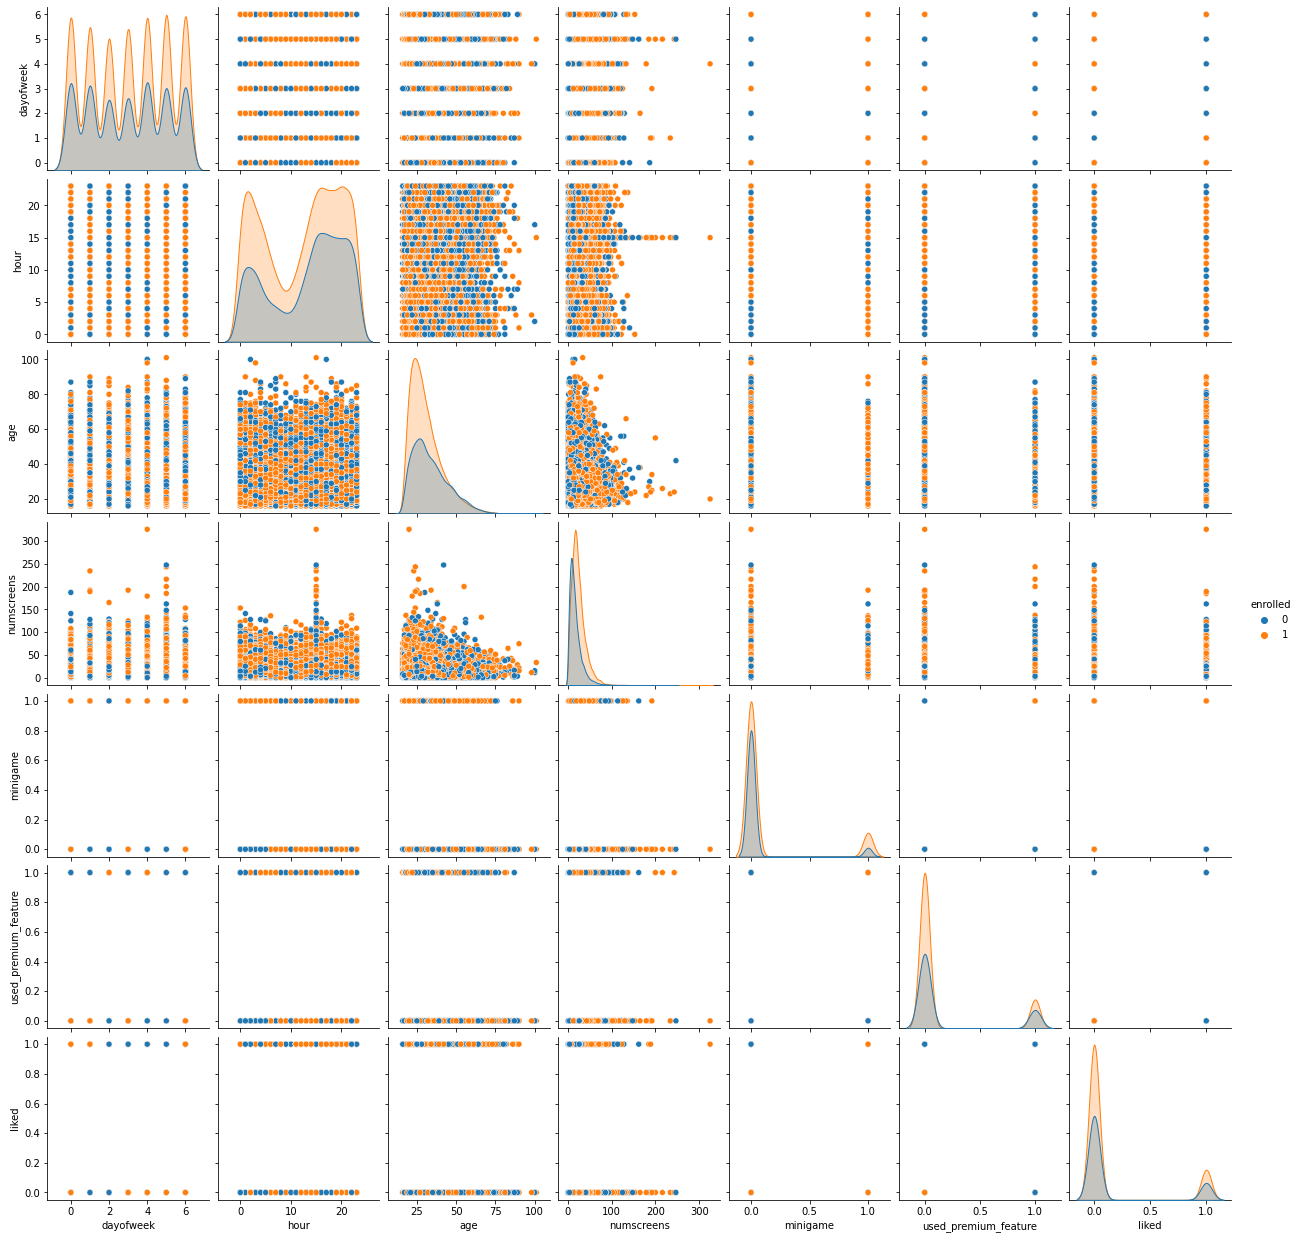

In [17]:
sns.pairplot(FineTech_appData2, hue = 'enrolled')

In pair plot we can see, the maximum features have two values like 0 and 1 and orange dots show the enrolled customer’s features. So we visualize the counterplot of enrolled data.

We have maximum of categorical data in 0 and 1 but few are continuous data such as age, screens, etc
Now plotting counter plot for enrolled data

# Counter Plot of Enrolled Column

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

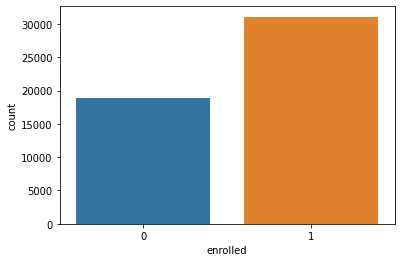

In [18]:
sns.countplot(FineTech_appData.enrolled)

In [19]:
# Maximum people enrolled and others didnt.
# Here you can see the exact value of enrolled & not enrolled customers.

In [20]:
# value enrolled and not enrolled customers
print("Not enrolled user = ", (FineTech_appData.enrolled < 1).sum(), "out of 50000")
print("Enrolled user = ",50000-(FineTech_appData.enrolled < 1).sum(),  "out of 50000")

Not enrolled user =  18926 out of 50000
Enrolled user =  31074 out of 50000


# Histogram of each feature of Finetech_app data

In pair plot, we saw the distribution of each feature but here we visualize in the histogram to understand easily.

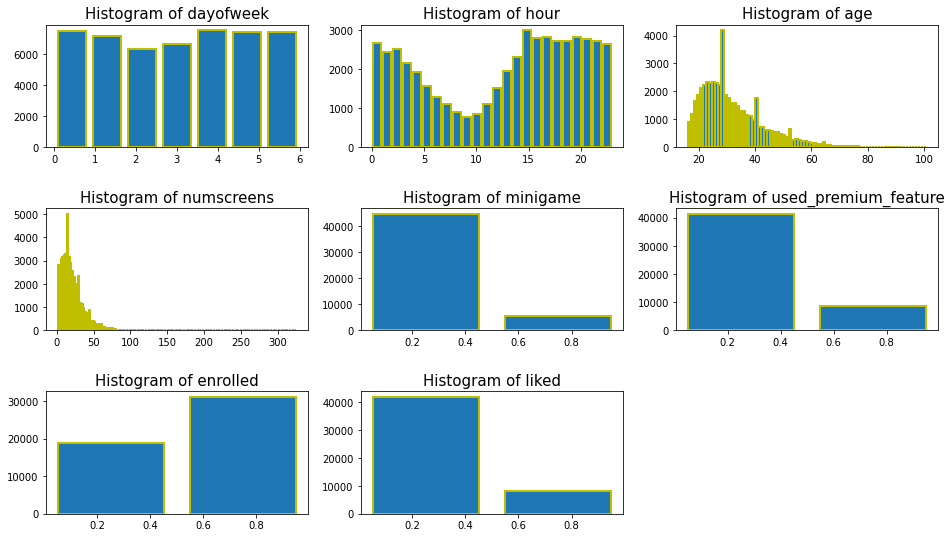

In [21]:
# plot histogram 
 
plt.figure(figsize = (16,9)) # figure size in ratio 16:9
features = FineTech_appData2.columns # list of columns name
for i,j in enumerate(features): 
    plt.subplot(3,3,i+1) # create subplot for histogram
    plt.title("Histogram of {}".format(j), fontsize = 15) # title of histogram
     
    bins = len(FineTech_appData2[j].unique()) # bins for histogram
    plt.hist(FineTech_appData2[j], bins = bins, rwidth = 0.8, edgecolor = "y", linewidth = 2, ) # plot histogram
     
plt.subplots_adjust(hspace=0.5) # space between horixontal axes (subplots)

In the above histogram, we can see minigame, used_primium_feature, enrolled, and like they have only two values and how they distributed.

The histogram of ‘dayofweek’ shows, on Tuesday and Wednesday slightly fewer customer registered the app.

The histogram of ‘hour’ shows the less customer register on the app around 10 AM.

The ‘age’ histogram shows, the maximum customers are younger.

The ‘numsreens’ histogram shows the few customers saw more than 40 screens.

# Correlation barplot with ‘enrolled’ feature

Now we are trying to know which feature is strongly correlated with ‘enrolled’ feature with positive or negative through barplot

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


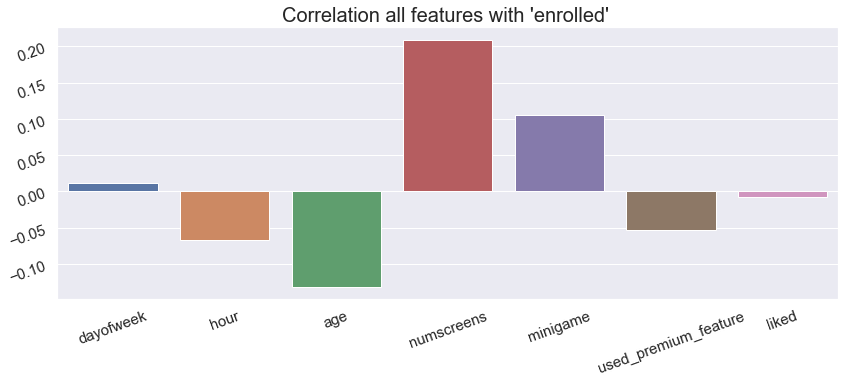

In [22]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
FineTech_appData3 = FineTech_appData2.drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(FineTech_appData3.columns,FineTech_appData3.corrwith(FineTech_appData2.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x & y ticks font

We saw the heatmap correlation matrix but this was not showing correlation clearly but you can easily understand which feature is how much correlated with ‘enrolled’ feature using the above barplot.

The ‘numscreens’ and ‘minigame’ is strongly positively correlated with ‘enrolled’ feature than other feature.

The ‘hour’, ‘age’ and ‘used_premium_feature’ are strongly negatively correlated with the ‘enrolled’ feature.

Now, we are parsing ‘first_open’ and ‘enrolled_date’ object data in data and time format.

In [23]:
# Object data
# parsing object data into data time format
FineTech_appData['first_open'] = [parser.parse(i) for i in FineTech_appData['first_open']]
FineTech_appData['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in FineTech_appData['enrolled_date']]
FineTech_appData.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

We are finding how much time the customer takes to get enrolled in the premium feature app after registration. For that subtract ‘fineTech_appData.first_open’ from ‘fineTech_appData.enrolled_date’ and set data type as timedelta64 in hours.



In [24]:
FineTech_appData['time_to_enroll'] =  (FineTech_appData.enrolled_date -  FineTech_appData.first_open).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <BarContainer object of 10 artists>)

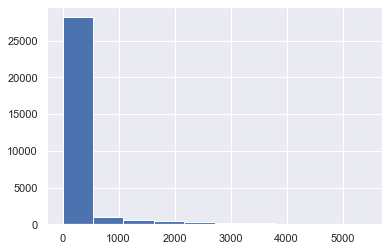

In [25]:
# Showing the distribution of time taken to enrolled the app.
# Plot Histogram 
plt.hist(FineTech_appData['time_to_enroll'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

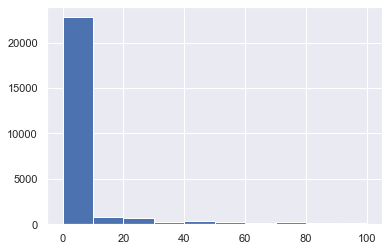

In [26]:
# let’s try to show the distribution in range 0 to 100 hours.
# Plot histogram
plt.hist(FineTech_appData['time_to_enroll'].dropna(), range =(0,100))

In the above histogram, we know the maximum customers have enrolled the app in 10 hours from the registration.



# Feature Selection

In [27]:
# we are considering those customers who enrolled after 48 hours as 0
# Those customers have enrolled after 48 hours set as 0
FineTech_appData.loc[FineTech_appData.time_to_enroll > 48, 'enrolled'] = 0

In [28]:
FineTech_appData

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enroll
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.



In [29]:
FineTech_appData.drop(columns = ['time_to_enroll', 'enrolled_date', 'first_open'], inplace=True)

In [30]:
FineTech_appData

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [31]:
# Read another CSV file that contains the top screens name.
# read csv file and convert it into numpy array
fineTech_app_screen_Data = pd.read_csv("top_screens.csv").top_screens.values

In [32]:
fineTech_app_screen_Data

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [33]:
type(fineTech_app_screen_Data)

numpy.ndarray

In [34]:
# Add ‘,’ at the end of each string of ‘screen_list’ for further operation.
FineTech_appData['screen_list'] = FineTech_appData.screen_list.astype(str) + ','

The ‘Screen_list’ contains string values but we can’t use it directly. So to solve this problem we are taking each screen name from ‘fineTech_app_screen_Data’ and append as a column by the same name to ‘fineTech_appData’. Then check this screen name is available in ‘screen_list’ if it is available then add value 1 else 0 in the appended column.


In [35]:
# string into to number
 
for screen_name in fineTech_app_screen_Data:
    FineTech_appData[screen_name] = FineTech_appData.screen_list.str.contains(screen_name).astype(int)
    FineTech_appData['screen_list'] = FineTech_appData.screen_list.str.replace(screen_name+",", "")

In [36]:
# get shape
FineTech_appData.shape

(50000, 68)

In [37]:
# You can see the shape of the dataset has changed from 12 to 68 columns.
# head of DataFrame
FineTech_appData.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,56480,2,9,20,"Home,ScanPreview,VerifySSN,product_review,prod...",14,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# TEST
FineTech_appData.screen_list.str.contains('Splash').astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: screen_list, Length: 50000, dtype: int32

In [39]:
FineTech_appData.screen_list.str.replace('Splash'+',', "")

0        joinscreen,product_review,ScanPreview,VerifyTo...
1        joinscreen,product_review,product_review2,Scan...
2                                                         
3        product_review,Home,product_review,ReferralCon...
4        joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
                               ...                        
49995    Home,ScanPreview,VerifySSN,product_review,prod...
49996                                                Home,
49997    joinscreen,product_review,product_review2,Scan...
49998    Home,product_review,product_review,product_rev...
49999    product_review,ScanPreview,ProfileVerifySSN,Pr...
Name: screen_list, Length: 50000, dtype: object

In [40]:
# Now taking a count of remaining screens other than  top screens which are left in screen_list
FineTech_appData.loc[0,'screen_list']

'joinscreen,product_review,ScanPreview,VerifyToken,ProfileVerifySSN,Settings,ForgotPassword,'

In [41]:
FineTech_appData.screen_list.str.count(',')

0         7
1         5
2         0
3         6
4        10
         ..
49995     6
49996     1
49997     6
49998    13
49999     5
Name: screen_list, Length: 50000, dtype: int64

In [42]:
FineTech_appData['remaining_screens'] = FineTech_appData.screen_list.str.count(',')

Droping ‘screen_list’ column

#### other than top screens used by customers, we took a total count of other screens used by customers
#### to convert the screen_list into integer values for Model Evaluation

In [43]:
# Drop the 'screen_list'
FineTech_appData.drop(columns = ['screen_list'], inplace=True)

In [44]:
# We have total columns 68
# total columns
FineTech_appData.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

All the saving screens correlated with each other that’s we are taking the sum of all saving screens in each row and store in a single row for all customers.
As we have a lot of columns for savings we will try to take sum of it and make a single column for better evaluation

In [45]:
# take sum of all saving screen in one place
saving_screens = ['Saving1',
                  'Saving2',
                  'Saving2Amount',
                  'Saving4',
                  'Saving5',
                  'Saving6',
                  'Saving7',
                  'Saving8',
                  'Saving9',
                  'Saving10',
                 ]
FineTech_appData['saving_screen_count'] = FineTech_appData[saving_screens].sum(axis = 1)
FineTech_appData.drop(columns = saving_screens, inplace = True)

In [46]:
FineTech_appData

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remaining_screens,saving_screen_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0,0,...,0,1,0,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,13,0


### similarly for credit, CC1 and loan screens.

In [47]:
credit_screens = ['Credit1',
                  'Credit2',
                  'Credit3',
                  'Credit3Container',
                  'Credit3Dashboard',
                 ]
FineTech_appData['credit_screens_count'] = FineTech_appData[credit_screens].sum(axis = 1)
FineTech_appData.drop(columns = credit_screens, axis = 1, inplace = True)


In [48]:
cc_screens = ['CC1',
              'CC1Category',
              'CC3',
             ]
FineTech_appData['cc_screens_count'] = FineTech_appData[cc_screens].sum(axis = 1)
FineTech_appData.drop(columns = cc_screens, axis = 1, inplace = True)

In [49]:
loan_screens = ['Loan',
                'Loan2',
                'Loan3',
                'Loan4',
               ]
FineTech_appData['loan_screens_count'] = FineTech_appData[loan_screens].sum(axis = 1)
FineTech_appData.drop(columns = loan_screens, axis = 1, inplace = True)

In [50]:
# Now, you can see the shape of DataFrame is reduced.

FineTech_appData.shape

(50000, 50)

In [51]:
FineTech_appData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int32
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int32
 10  Institutions             50000 non-null  int32
 11  VerifyPhone              50000 non-null  int32
 12  BankVerification         50000 non-null  int32
 13  VerifyDateOfBirth        50000 non-null  int32
 14  ProfilePage              50000 non-null  int32
 15  Ve

In [52]:
# Numerical distribution of fineTech_appData
FineTech_appData.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remaining_screens,saving_screen_count,credit_screens_count,cc_screens_count,loan_screens_count
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


### Now we have a clean dataset with no null values and containing all integer values 
#### now we can do visualization of clean data and then perform model evaluation

# Heatmap Wiith Correlation Matrix of new and Clean Finetech_appData

<AxesSubplot:>

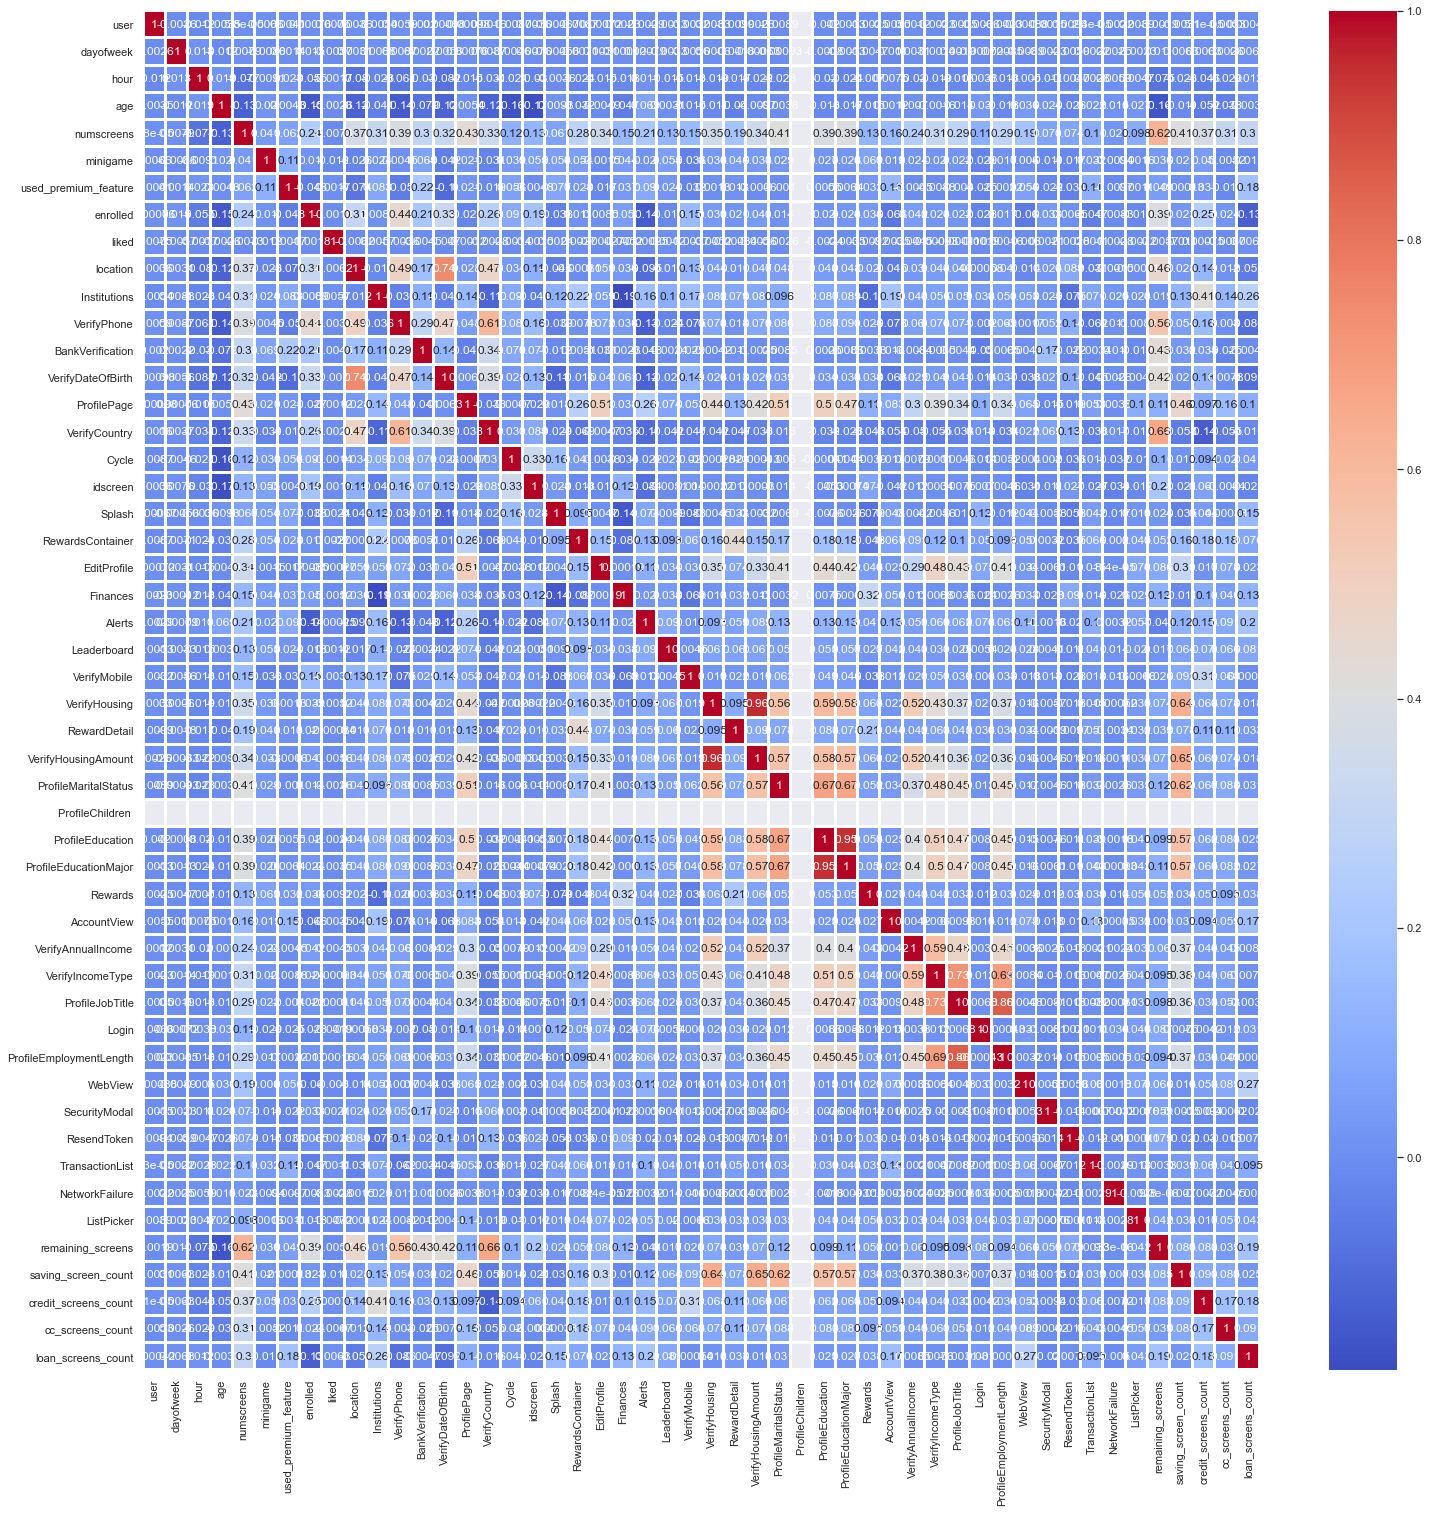

In [53]:
plt.figure(figsize=(25,25))
sns.heatmap(FineTech_appData.corr() , annot = True, linewidth = 2, cmap = 'coolwarm')

 There is one blank line going within heatmap because that column contains all the null value 
 column = 'ProfileChildren ' has all the null values

In [54]:
FineTech_appData['ProfileChildren '].unique()

array([0])

In [55]:
FineTech_appData['ProfileChildren ']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: ProfileChildren , Length: 50000, dtype: int32

# Data Preprocessing

## Split Data into Train and Test

In [56]:
clean_FineTech_appData = FineTech_appData
target = FineTech_appData['enrolled']
FineTech_appData.drop(columns = 'enrolled', inplace =True)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FineTech_appData, target, test_size = 0.2, random_state = 0)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 49)
Shape of X_test =  (10000, 49)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [58]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 48)
Shape of X_test =  (10000, 48)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Feature Scaling

The multiple features in the different units so for the best accuracy need to convert all features in a single unit.



In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Building
The target variable is categorical type 0 and 1, so we have to use supervised classification algorithms.

To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model. So let’s try.

First, we import the required packages.

In [60]:
# impoRT required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train , y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6983

In [63]:
# train with Standert Scaling dataset
dt_model2 = DecisionTreeClassifier(criterion='entropy')
dt_model2.fit(X_train_sc , y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.6979

# K- Nearest Neighbor Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [65]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
# y_pred_knn = knn_model.predict(X_test)
# print(metrics.accuracy_score(y_test, y_pred_knn))

In [67]:
# train with Standert Scaling dataset
knn_model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model2.fit(X_train_sc, y_train)
# y_pred_knn_sc = knn_model2.predict(X_test_sc)
 
# accuracy_score(y_test, y_pred_knn_sc)

KNeighborsClassifier()

# Naive Bayes Classifier

In [68]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
 
accuracy_score(y_test, y_pred_nb)

0.7114

In [69]:
# train with Standert Scaling dataset
nb_model2 = GaussianNB()
nb_model2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_nb_sc)

0.7114

# Random Forest Classifier

In [70]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
accuracy_score(y_test, y_pred_rf)

0.7621

In [71]:
# train with Standert Scaling dataset
rf_model2 = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_rf_sc)

0.7616

# Logistic Regression

In [72]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7687

In [73]:
# train with Standert Scaling dataset
lr_model2 = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model2.fit(X_train_sc, y_train)
y_pred_lr_sc = lr_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_lr_sc)

0.768

# Support Vector Classifier

In [74]:
# Support Vector Machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
 
accuracy_score(y_test, y_pred_svc)

0.7609

In [75]:
# train with Standert Scaling dataset
svc_model2 = SVC()
svc_model2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_svc_sc)

0.7789

# XGBoost Classifier

In [76]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:42] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.781

In [77]:
# train with Standert Scaling dataset
xgb_model2 = XGBClassifier()
xgb_model2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_model2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc)

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:46] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.781

### Lets apply parameter Tuning in XGBoostClassiifieer

In [78]:
# XGB classifier with parameter tuning
xgb_model_pt1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt1.fit(X_train, y_train)
y_pred_xgb_pt1 = xgb_model_pt1.predict(X_test)
 
accuracy_score(y_test, y_pred_xgb_pt1)

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:09:50] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7879

In [80]:
# XGB classifier with parameter tuning
# train with Stander Scaling dataset
xgb_model_pt2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
 
xgb_model_pt2.fit(X_train_sc, y_train)
y_pred_xgb_sc_pt2 = xgb_model_pt2.predict(X_test_sc)
 
accuracy_score(y_test, y_pred_xgb_sc_pt2)

c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:39] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7879

We observ that Support Vector Classifier and XGBoost Classifier give best accuracy than ohter ML algorithm. But we will continue with XGBoost classifier because the accuracy is slightly higher than SVC.

# Confusion Matrix

Text(0.5, 1.0, 'Confussion Matrix')

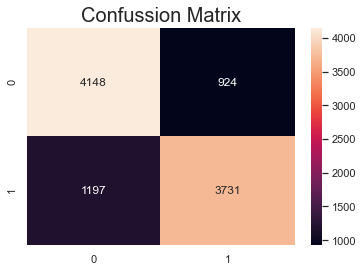

In [81]:
# confussion matrix
cm_xgb_pt2 = confusion_matrix(y_test, y_pred_xgb_sc_pt2)
sns.heatmap(cm_xgb_pt2, annot = True, fmt = 'g')
plt.title("Confussion Matrix", fontsize = 20) 

The model is giving type II error higher than type I.

# Classification report of ML model


In [82]:
# Clasification Report
cr_xgb_pt2 = classification_report(y_test, y_pred_xgb_sc_pt2)
 
print("Classification report >>> \n", cr_xgb_pt2)


Classification report >>> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80      5072
           1       0.80      0.76      0.78      4928

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



# Cross-validation of the ML model

To find the ML model is overfitted, under fitted or generalize doing cross-validation.

In [83]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())

[16:22:26] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:59] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:36] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:13] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:32:50] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:35:30] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:07] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:40:45] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:43:28] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\akanksha manro\appdata\local\programs\python\python38-32\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:46:15] WARNING: D:\Build\xgboost\xgboost-1.4.2.git\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross validation of XGBoost model =  [0.793   0.78    0.78925 0.783   0.779   0.7875  0.79325 0.7795  0.79125
 0.77825]
Cross validation of XGBoost model (in mean) =  0.7853999999999999


The mean value cross-validation and XGBoost model accuracy is 78%. That means our XGBoost model is a generalized model.

# Mapping predicted output to the target

In the below output, you can find the predicted output by model and actual target output.

In [84]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_xgb_sc_pt2
 
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 0
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 1
47278  248318         0                 0
37020  142418         1                 1
2217   279355         1                 0

[10000 rows x 3 columns]


# Save the Machine Learning model

After completion of the Machine Learning project or building the ML model need to deploy in an application. To deploy the ML model need to save it first. To save the Machine Learning project we can use the pickle or joblib package.

Here, we will see both ways, Use anyone which is better for you.


## Save the ML model with Pickle

In [85]:
## Pickle
import pickle
 
# save model
pickle.dump(xgb_model_pt2, open('FineTech_app_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open(r'C:\Users\Akanksha manro\Desktop\SEM 5\machine learning\projects\ML Projects Full\FineTech_app_ML_model.pickle', 'rb'))
 
# predict the output
y_pred_pl = ml_model_pl.predict(X_test_sc) 
 
# confusion matrix
cm_pl = confusion_matrix(y_test, y_pred_pl)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(y_test, y_pred_pl))

Confussion matrix = 
 [[4148  924]
 [1197 3731]]
Accuracy of model =  0.7879


## Save the Ml model with Joblib

In [87]:
## Joblib
import joblib
 
# save model
joblib.dump(xgb_model_pt2, 'FineTech_app_ML_model.joblib')
 
# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')
 
# predict the output 
y_pred_jl = ml_model_jl.predict(X_test_sc)
 
cm_jl = confusion_matrix(y_test, y_pred_jl)
print('Confussion matrix = \n', cm_jl)
 
print("Accuracy of model = ", accuracy_score(y_test, y_pred_jl))

Confussion matrix = 
 [[4148  924]
 [1197 3731]]
Accuracy of model =  0.7879
